In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../1lab/stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df = df.dropna()
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
signs = ['bmi', 'avg_glucose_level']
x = df[signs]
y_true = df['hypertension']

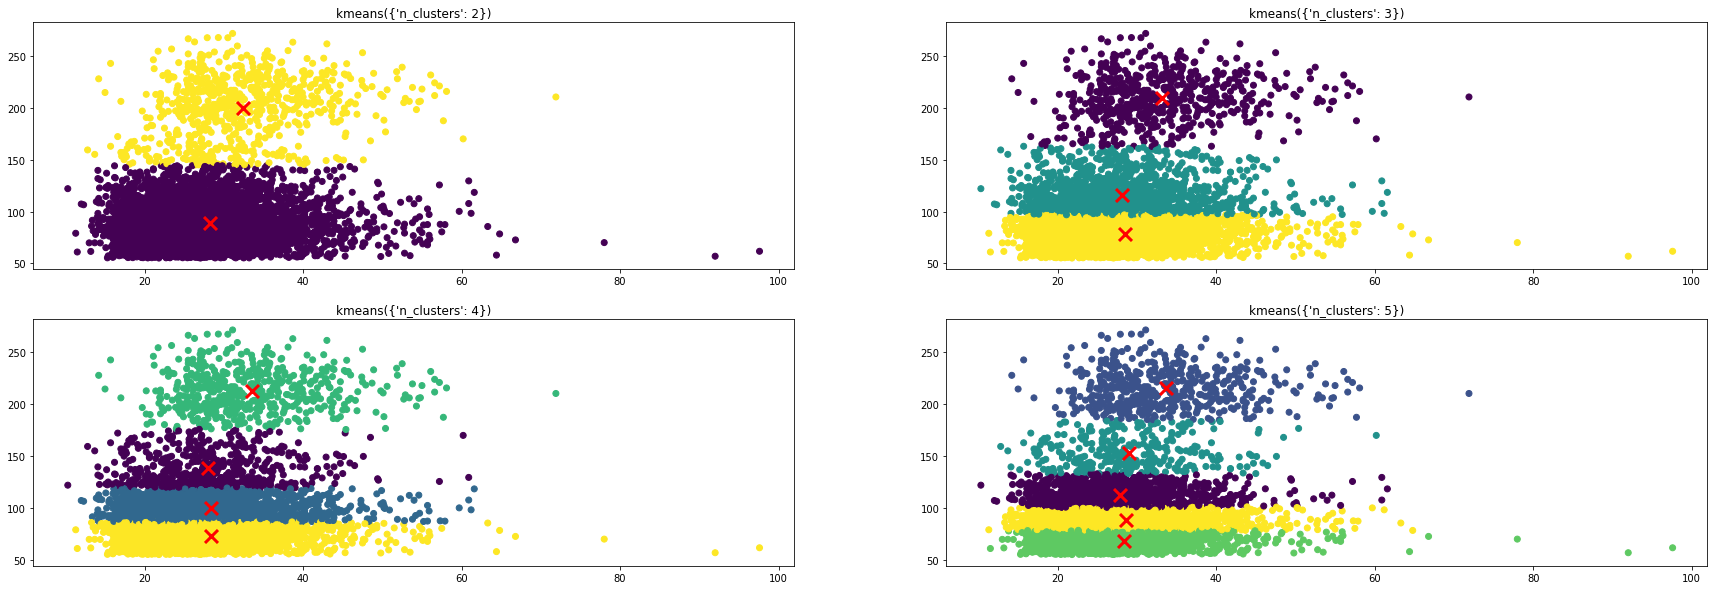

┌───────────────────┬─────────────────────┬──────────────────────┬──────────────────────┬─────────────────────┐
│ params            │ homo                │ compl                │ v-meas               │ silhouette          │
├───────────────────┼─────────────────────┼──────────────────────┼──────────────────────┼─────────────────────┤
│ {'n_clusters': 2} │ 0.05029648111145865 │ 0.037375991966185296 │ 0.042884175795621066 │   0.737308239551861 │
├───────────────────┼─────────────────────┼──────────────────────┼──────────────────────┼─────────────────────┤
│ {'n_clusters': 3} │ 0.05603511629262109 │ 0.018398590085278683 │  0.02770162027978665 │  0.5171402292748413 │
├───────────────────┼─────────────────────┼──────────────────────┼──────────────────────┼─────────────────────┤
│ {'n_clusters': 4} │ 0.05120322293317981 │ 0.012942667416323633 │ 0.020662470548221224 │ 0.46109310873057013 │
├───────────────────┼─────────────────────┼──────────────────────┼──────────────────────┼───────────────

In [13]:
# импортируем необходимые библиотеки
from sklearn.cluster import KMeans
from sklearn import metrics
import tabletext
# определяем гиперпараметры
params = [
    {'n_clusters': 2},
    {'n_clusters': 3},
    {'n_clusters': 4},
    {'n_clusters': 5},
]
# определяем различные параметры для отображения графиков
n_rows = (len(params)+1)//2
n_cols = 2
plt.figure(figsize=(30,10))
# задаем названия столбцов будущей таблицы
columns = ['params', 'homo', 'compl', 'v-meas', 'silhouette']
results = [columns]

for i, p in enumerate(params):
    # выполнение кластеризации
    cl = KMeans(**p)
    cl.fit(x)
    y_pred = cl.predict(x)
    # определение центров
    centers = cl.cluster_centers_
    # вычисление метрик
    # и добавление данных в таблицу
    silhouette_avg = metrics.silhouette_score(x, y_pred)
    cl_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
    ]
    res = [str(p)]
    res += [m(y_true, y_pred) for m in cl_metrics]
    res += [silhouette_avg]
    results += [res]
    # построение графика
    plt.subplot(n_rows, n_cols, i+1)
    plt.title(f'kmeans({p})')
    plt.scatter(x[signs[0]], x[signs[1]], c=y_pred)
    plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=169, linewidths=3, c='red')

plt.show()
print(tabletext.to_text(results))

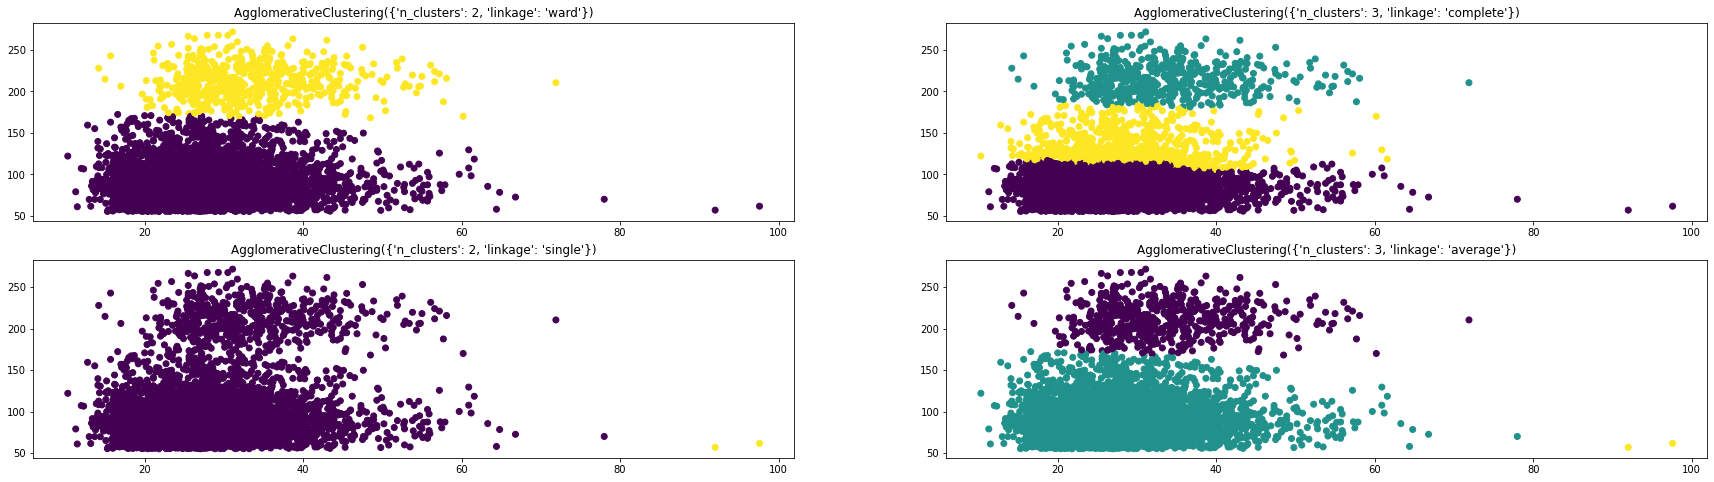

┌──────────────────────────────────────────┬──────────────────────┬─────────────────────┬──────────────────────┬────────────────────┐
│ params                                   │ homo                 │ compl               │ v-meas               │ silhouette         │
├──────────────────────────────────────────┼──────────────────────┼─────────────────────┼──────────────────────┼────────────────────┤
│ {'n_clusters': 2, 'linkage': 'ward'}     │  0.05546467665644412 │ 0.04794771851131024 │  0.05143299696965664 │  0.744167378995834 │
├──────────────────────────────────────────┼──────────────────────┼─────────────────────┼──────────────────────┼────────────────────┤
│ {'n_clusters': 3, 'linkage': 'complete'} │  0.04705083236317815 │  0.0195317777607034 │ 0.027604396987858215 │ 0.5508329937638602 │
├──────────────────────────────────────────┼──────────────────────┼─────────────────────┼──────────────────────┼────────────────────┤
│ {'n_clusters': 2, 'linkage': 'single'}   │ 0.003172474949288

In [14]:
# импортируем необходимые библиотеки
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid
# определяем гиперпараметры
params = [
    {'n_clusters': 2, 'linkage': 'ward'},
    {'n_clusters': 3, 'linkage': 'complete'},
    {'n_clusters': 2, 'linkage': 'single'},
    {'n_clusters': 3, 'linkage': 'average'},
]
# определяем различные параметры для отображения графиков
n_rows = (len(params)+1)//2
n_cols = 2
plt.figure(figsize=(30,8))
# задаем названия столбцов будущей таблицы
columns = ['params', 'homo', 'compl', 'v-meas', 'silhouette']
results = [columns]

for i, p in enumerate(params):
    # выполнение кластеризации
    cl = AgglomerativeClustering(**p)
    y_pred = cl.fit_predict(x)
    # вычисление метрик
    # и добавление данных в таблицу
    silhouette_avg = metrics.silhouette_score(x, y_pred)
    cl_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
    ]
    res = [str(p)]
    res += [m(y_true, y_pred) for m in cl_metrics]
    res += [silhouette_avg]
    results += [res]
    # построение графика
    plt.subplot(n_rows, n_cols, i+1)
    plt.title(f'AgglomerativeClustering({p})')
    plt.scatter(x[signs[0]], x[signs[1]], c=y_pred)

plt.show()
print(tabletext.to_text(results))

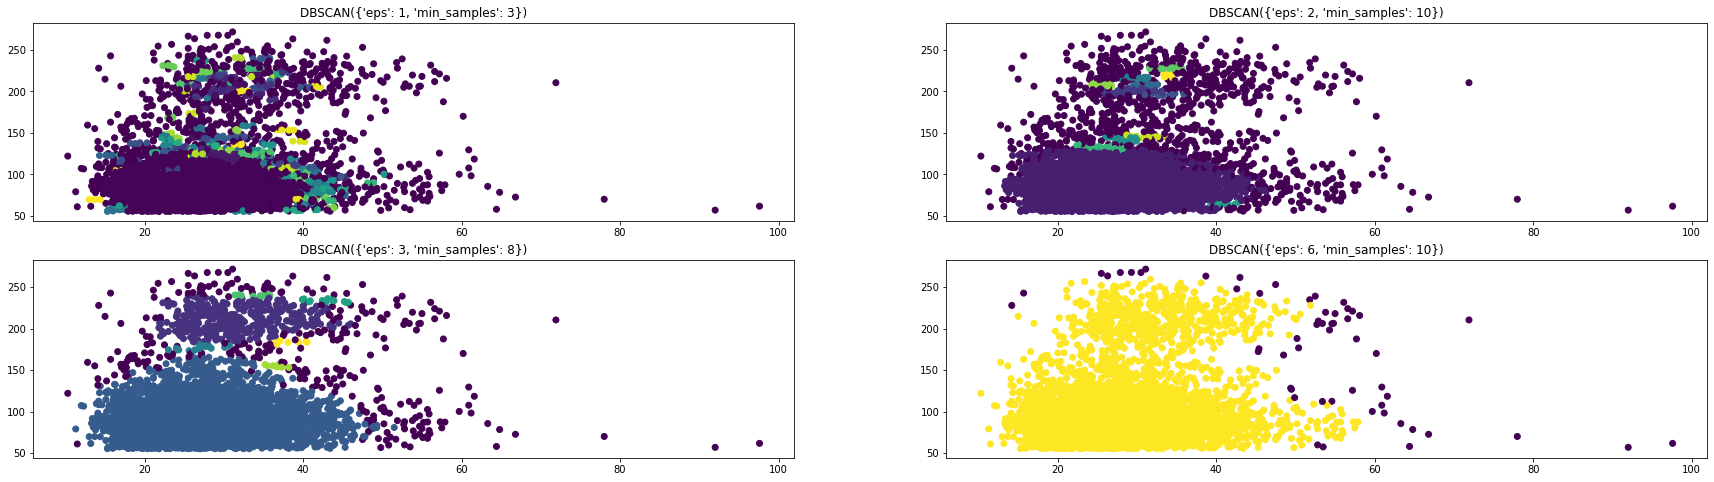

┌───────────────────────────────┬──────────┬───────┬──────────────────────┬──────────────────────┬──────────────────────┬──────────────────────┐
│ params                        │ clusters │ noise │ homo                 │ compl                │ v-meas               │ silhouette           │
├───────────────────────────────┼──────────┼───────┼──────────────────────┼──────────────────────┼──────────────────────┼──────────────────────┤
│ {'eps': 1, 'min_samples': 3}  │      124 │   818 │   0.0880598922603984 │ 0.018311408786734318 │ 0.030318340925085493 │ -0.47584333627138536 │
├───────────────────────────────┼──────────┼───────┼──────────────────────┼──────────────────────┼──────────────────────┼──────────────────────┤
│ {'eps': 2, 'min_samples': 10} │       12 │   894 │  0.04591122552194521 │  0.01943300448075124 │  0.02730747768388809 │ -0.12202524380306327 │
├───────────────────────────────┼──────────┼───────┼──────────────────────┼──────────────────────┼──────────────────────┼─────────

In [15]:
# импортируем необходимые библиотеки
from sklearn.cluster import DBSCAN
# определяем гиперпараметры
params = [
    {'eps': 1, 'min_samples': 3},
    {'eps': 2, 'min_samples': 10},
    {'eps': 3, 'min_samples': 8},
    {'eps': 6, 'min_samples': 10},
]
# определяем различные параметры для отображения графиков
n_rows = (len(params)+1)//2
n_cols = 2
plt.figure(figsize=(30,8))
# задаем названия столбцов будущей таблицы
columns = ['params', 'clusters', 'noise' ,'homo', 'compl', 'v-meas', 'silhouette']
results = [columns]

for i, p in enumerate(params):
    # выполнение кластеризации
    cl = DBSCAN(**p)
    cl.fit(x)
    y_pred = cl.labels_
    # number of clusters in labels, ignoring noise if present.
    n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
    n_noise = list(y_pred).count(-1)
    # вычисление метрик
    # и добавление данных в таблицу
    silhouette_avg = metrics.silhouette_score(x, y_pred)
    cl_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
    ]
    res = [str(p), n_clusters, n_noise]
    res += [m(y_true, y_pred) for m in cl_metrics]
    res += [silhouette_avg]
    results += [res]
    # построение графика
    plt.subplot(n_rows, n_cols, i+1)
    plt.title(f'DBSCAN({p})')
    plt.scatter(x[signs[0]], x[signs[1]], c=y_pred)

plt.show()
print(tabletext.to_text(results))